# Estadística básica interactiva
Este notebook muestra ejemplos de carga, limpieza, conteos, cuartiles y visualizaciones para los CSV en `db/`. Sigue las celdas en orden; puedes editar los nombres de archivo según tus ficheros en `db/`.

In [23]:
# Celda 2: importar utilidades
import pandas as pd
from src import data, visual
print('módulos cargados')

módulos cargados


In [24]:
# Celda 3: listar ficheros en db/
from pathlib import Path
DB = Path('db')
files = sorted([p.name for p in DB.glob('*.*')])
files

['.gitkeep',
 'clientes.xlsx - clientes.csv.csv',
 'detalle_ventas.xlsx - detalle_ventas.csv.csv',
 'inventory.csv',
 'productos.xlsx - productos.csv.csv',
 'ventas.xlsx - ventas.csv.csv']

## Cargar un archivo de ejemplo
Sustituye el nombre por uno de los ficheros listados en la celda anterior.

In [25]:
# Celda 5: carga de ejemplo (cambia el nombre si tu fichero difiere)
fname = 'productos.xlsx - productos.csv.csv'  # <- ajustar si es necesario
df = data.load_csv(fname, verbose=True)
df.head()

Trying read_csv(path=/home/jiss/Documentos/repos/Entregable1/db/productos.xlsx - productos.csv.csv, encoding=utf-8, sep=,)


,id_producto,nombre_producto,categoria,precio_unitario
0,1,Coca Cola 1.5L,Alimentos,2347
1,2,Pepsi 1.5L,Limpieza,4973
2,3,Sprite 1.5L,Alimentos,4964
3,4,Fanta Naranja 1.5L,Limpieza,2033
4,5,Agua Mineral 500ml,Alimentos,4777


In [27]:
# Celda 6: resumen básico y métricas
summary = data.summarize_df(df)
import pprint
pprint.pprint({k: summary[k] for k in ('rows','cols','total_missing','cols_with_missing')})

# Ver las primeras columnas y dtypes
print('Columns:', summary['columns'])
print('Dtypes:', summary['dtypes'])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

## Conteos y cuartiles
A continuación usamos `value_counts()` para ver elementos repetidos y `quantile()` para cuartiles en columnas numéricas.

In [28]:
# Celda 8: conteos y cuartiles para una columna (ajusta si quieres otra)
col = df.columns[0]
print('Columna:', col)
print('Top repetidos:')
print(df[col].value_counts(dropna=False).head(10))

# Si la columna es numérica, mostrar cuartiles
if pd.api.types.is_numeric_dtype(df[col]):
    print('Cuartiles (25,50,75):')
    print(df[col].quantile([0.25, 0.5, 0.75]))
else:
    print('La columna no es numérica; escoge otra para cuartiles.')

Columna: id_producto
Top repetidos:
id_producto
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: count, dtype: int64
Cuartiles (25,50,75):
0.25    25.75
0.50    50.50
0.75    75.25
Name: id_producto, dtype: float64


## Visualizaciones rápidas
Generamos histograma y boxplot para una columna numérica (si procede).

Usando columna numérica: id_producto


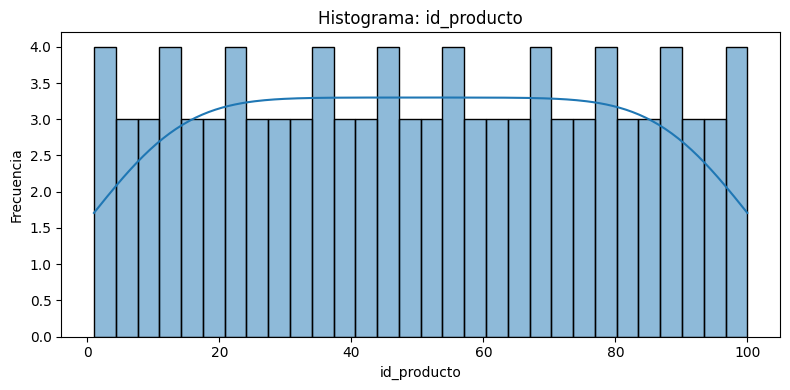

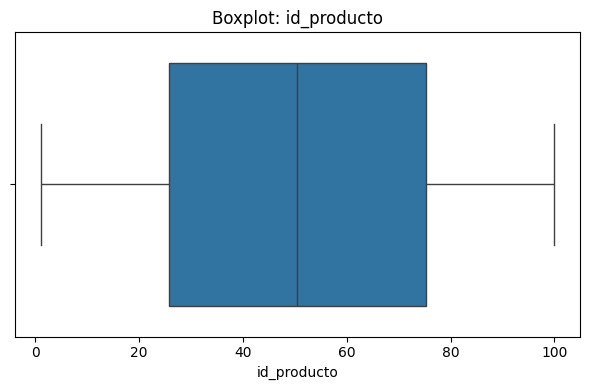

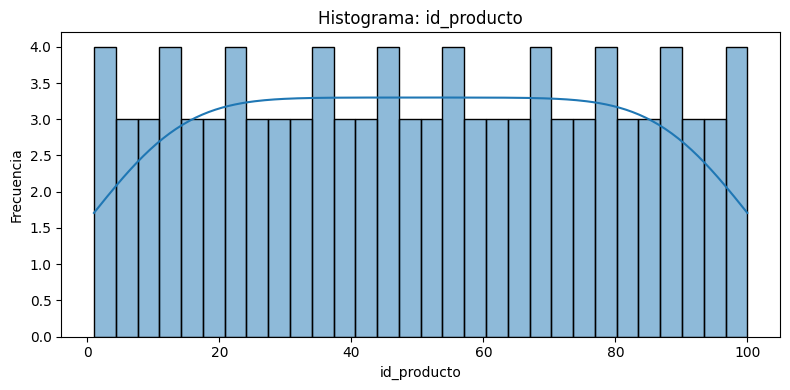

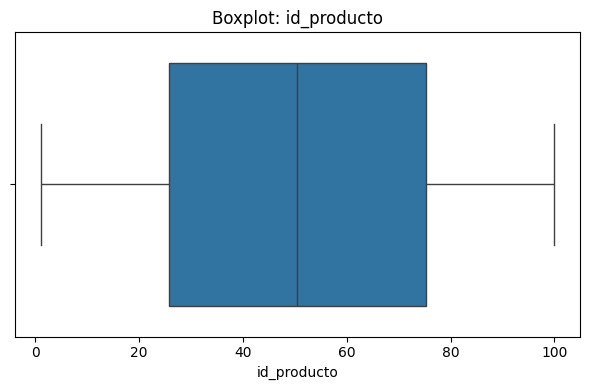

In [29]:
# Celda 10: gráficos
num_cols = df.select_dtypes(include=['number']).columns.tolist()
if num_cols:
    c = num_cols[0]
    print('Usando columna numérica:', c)
    fig = visual.plot_hist(df, c)
    display(fig)
    fig2 = visual.plot_box(df, c)
    display(fig2)
else:
    print('No hay columnas numéricas para graficar.')